### Part 1 - Get Data and Pre-Process

In [298]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as pyo

from plotly.subplots import make_subplots


pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [299]:
# Fetch data 
diamonds_data = pd.read_csv('./diamonds.csv')

diamonds_data.head()

,rownames,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


In [300]:
# Drop the column ‘rownames’ as it is simply an index of the diamonds.
diamonds_data.drop(columns = ['rownames'], inplace = True)


In [301]:
diamonds_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


In [302]:
# Check if there are any NaN values: No NaN Values in any of the columns
diamonds_data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [303]:
# How many rows of data (n) are in the data frame : Total number of rows = 53490
# .shape returns a tuple with number of rows and columns respectively
diamonds_data.shape

(53940, 10)

In [304]:
# All sets of values taken by each of the three categorical variables, cut, color and clarity.
print(set(diamonds_data['cut']))
print(set(diamonds_data['color']))
print(set(diamonds_data['clarity']))

{'Good', 'Very Good', 'Premium', 'Ideal', 'Fair'}
{'G', 'J', 'I', 'E', 'F', 'D', 'H'}
{'VS2', 'I1', 'VVS2', 'SI1', 'VVS1', 'VS1', 'IF', 'SI2'}


### Part 2 - Simple Linear Regression

* Plot a heatmap to find what variable 'price' is most correlated to: price is most correlated to **'carat'** with a value of **0.92**
* The heatmap is interactive, allowing us to view the correlation coefficients between each pair of variables by hovering over it. 

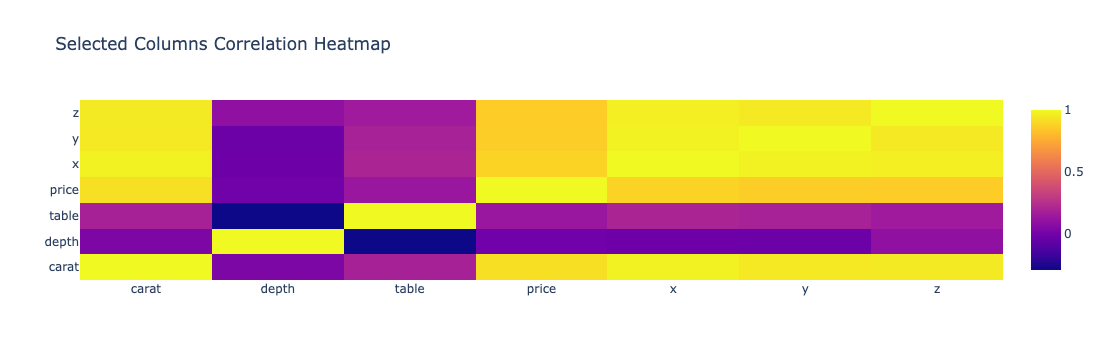

In [305]:
selected_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

correl = diamonds_data[selected_columns].corr()

# Create heatmap trace
heatmap_trace = go.Heatmap(z=correl.values,
                          x=correl.index.values,
                          y=correl.columns.values)
# Create layout
layout = go.Layout(title='Selected Columns Correlation Heatmap')

fig = go.Figure(data=[heatmap_trace], layout=layout)

# Plot the heatmap
fig.show()

* Split the data into a train and test data with a test size of 25% and random state of 50
* The sizes of the training and testing datasets are **40,455** and **13,485**, respectively, while the initial indices for the training and testing data are **32,301** and **44,751**, respectively.

In [306]:
X = diamonds_data[['carat']]
y = diamonds_data['price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

X_train
X_test
y_train
y_test

,carat
32301,0.37
39009,0.40
22757,1.02
15129,1.07
17861,1.19
...,...
48417,0.70
22637,2.00
42891,0.51
38368,0.53


,carat
44751,0.51
22963,2.01
9078,1.08
26148,2.13
29451,0.33
...,...
8884,1.04
34947,0.30
21821,1.50
9942,1.01


32301      454
39009     1056
22757    10773
15129     6082
17861     7207
         ...  
48417     1971
22637    10685
42891     1359
38368     1023
14000     5698
Name: price, Length: 40455, dtype: int64

44751     1619
22963    11011
9078      4521
26148    15454
29451      702
         ...  
8884      4486
34947      378
21821     9892
9942      4693
8296      4385
Name: price, Length: 13485, dtype: int64

* Perform Simple Linear Regression using the Train Data.
* The R-squared values are **0.8486** for the training data and **0.85148** for the testing data, respectively. These figures suggest that the model accounts for approximately **85%** of the variance in the outcome variable, pointing to a relatively strong model fit. Furthermore, the positive value of the Beta_1 coefficient indicates a direct relationship between the predictor and outcome variables. The Beta_0 coefficient, around **-2244.804**, represents the y-intercept, or the predicted value of the outcome variable when all predictors are set to zero.

In [307]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

# The following gives the R-square score
r_squared = model.score(X_train, y_train)
r_squared_test = model.score(X_test, y_test)


# This is the coefficient Beta_1 (or slope of the Simple Linear Regression line)
coefficient = model.coef_

# This is the coefficient Beta_0
intercept = model.intercept_


print("R-squared:", r_squared)
print("R-squared test:", r_squared_test)
print("Coefficient Beta_1:", coefficient)
print("Coefficient Beta_0:", intercept)

LinearRegression()

R-squared: 0.8486051211546091
R-squared test: 0.8514897700970667
Coefficient Beta_1: [7740.34546342]
Coefficient Beta_0: -2244.8040004113227


In [308]:
# Assuming 'model' is already trained
test_output = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=['predicted_price'])
test_output.head()

,predicted_price
44751,"1,702.77"
22963,"13,313.29"
9078,"6,114.77"
26148,"14,242.13"
29451,309.51


* Dataframe with the predicted values and the actual values as well as the mean absolute error (MAE) and fraction of MAE to the average price.
* An MAE of **998.5** indicates that the model's forecasts deviate from the true values by an average of approximately **998.5** units. Given the R-Squared value of **0.84**, this level of mean absolute error was anticipated.


In [309]:
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['predicted_price'] - test_output['price']).mean()

average_price = np.mean(y_test)
mae_fraction = mean_absolute_error / average_price


print('Mean absolute error is ')
print(mean_absolute_error)
print(f"Fraction of MAE to Average Price: {mae_fraction}")


,predicted_price,price
44751,"1,702.77",1619
22963,"13,313.29",11011
9078,"6,114.77",4521
26148,"14,242.13",15454
29451,309.51,702


Mean absolute error is 
998.4973200867355
Fraction of MAE to Average Price: 0.2541206399951147


### Multiple Linear Regression

* Train-Test Split by considering multiple numerical variables for the model. 
* The count of rows remains consistent for both the training and testing datasets, whether it's the split for simple linear regression (SLR) or multiple linear regression (MLR). Similarly, the starting index of the first row does not vary between the splits for SLR and MLR. This consistency arises from the fact that the division of data into training and testing sets is independent of the quantity of predictor variables involved.

In [310]:
# This is just to show how we can do test train split like we did for excel in class
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(diamonds_data[['carat', 'depth', 'table', 'x', 'y', 'z']], diamonds_data['price'], test_size=0.25, random_state=50) 


X_train_multi
X_test_multi
y_train_multi
y_test_multi

,carat,depth,table,x,y,z
32301,0.37,60.70,60.00,4.65,4.68,2.83
39009,0.40,61.70,57.00,4.77,4.73,2.93
22757,1.02,61.40,58.00,6.46,6.43,3.96
15129,1.07,62.30,55.00,6.59,6.54,4.09
17861,1.19,61.70,56.00,6.78,6.81,4.19
...,...,...,...,...,...,...
48417,0.70,62.40,58.00,5.62,5.67,3.52
22637,2.00,60.30,56.00,8.27,8.16,4.94
42891,0.51,62.80,57.00,5.12,5.10,3.21
38368,0.53,63.80,57.00,5.10,5.12,3.26


,carat,depth,table,x,y,z
44751,0.51,61.40,58.00,5.13,5.09,3.14
22963,2.01,62.90,54.00,8.06,7.93,5.05
9078,1.08,62.10,59.00,6.57,6.53,4.07
26148,2.13,61.50,57.00,8.27,8.34,5.11
29451,0.33,61.90,56.00,4.46,4.49,2.77
...,...,...,...,...,...,...
8884,1.04,62.40,56.00,6.40,6.48,4.02
34947,0.30,61.90,60.00,4.27,4.29,2.65
21821,1.50,60.20,61.00,7.27,7.32,4.39
9942,1.01,61.10,56.00,6.44,6.48,3.95


32301      454
39009     1056
22757    10773
15129     6082
17861     7207
         ...  
48417     1971
22637    10685
42891     1359
38368     1023
14000     5698
Name: price, Length: 40455, dtype: int64

44751     1619
22963    11011
9078      4521
26148    15454
29451      702
         ...  
8884      4486
34947      378
21821     9892
9942      4693
8296      4385
Name: price, Length: 13485, dtype: int64

* Create a multiple regression model based on the train-test data. 
* The R-squared values are **0.8580** for the training data and **0.8623** for the testing data, indicating a relatively strong model fit. Incorporating additional features resulted in a modest enhancement of the fit, improving it by merely **1%-2%**.

In [311]:
model_multi = LinearRegression(fit_intercept=True)
model_multi.fit(X_train_multi, y_train_multi)

# The following gives the R-square score
r_squared = model_multi.score(X_train_multi, y_train_multi)
r_squared_test = model_multi.score(X_test_multi, y_test_multi)


# This is the coefficient Beta_1 (or slope of the Simple Linear Regression line)
coefficient = model_multi.coef_

# This is the coefficient Beta_0
intercept = model_multi.intercept_


print("R-squared:", r_squared)
print("R-squared test:", r_squared_test)
print("Coefficient Beta_1:", coefficient)
print("Coefficient Beta_0:", intercept)

LinearRegression()

R-squared: 0.8580892707297321
R-squared test: 0.8623985511113464
Coefficient Beta_1: [10572.42070164  -212.30889735  -100.98829263 -1339.48535974
    28.72790744   207.71501298]
Coefficient Beta_0: 21184.406953430855


* Create a dataframe of the predicted prices and actual prices as well as calculate the MAE and MAER.
* The Mean Absolute Error (MAE) is calculated as **882.59**, while the Mean Absolute Error Ratio (MAER) is **0.2246**. This represents a significant reduction compared to the Simple Linear Regression (SLR) model, indicating that the predictions are now much closer to the actual values than those made by the SLR.

In [312]:
# Predict the target variable on the test data
y_test_pred_multi = model_multi.predict(X_test_multi)

# Create a dataframe with predictions and actual prices
predictions_df = pd.DataFrame({'Predicted Price': y_test_pred_multi, 'Actual Price': y_test_multi})

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test_pred_multi - y_test_multi))

# Calculate fraction of MAE to the average price in the test set
average_price = np.mean(y_test_multi)
mae_fraction = mae / average_price

# Display MAE and fraction of MAE to average price
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Fraction of MAE to Average Price: {mae_fraction}")
predictions_df.head(20)


Mean Absolute Error (MAE): 882.5996348443864
Fraction of MAE to Average Price: 0.22462432252359685


,Predicted Price,Actual Price
44751,"1,610.14",1619
22963,"14,107.90",11011
9078,"5,692.50",4521
26148,"15,113.80",15454
29451,606.29,702
23983,"9,547.81",12141
24181,"17,148.17",12364
50466,"3,166.81",2265
1844,"2,976.18",3063
9443,"5,252.12",4592


### Multiple Linear Regression with Categorical Variables

* Display first 5 rows

In [313]:
diamonds_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


* Perform One hot encoding on the categorical variables. 
* The total number of columns after one-hot encoding of the categorical variables is **24**. Initially, there were **7** columns, which expanded to **24** following the encoding process. By applying `drop='first'` to avoid multicollinearity, one column representing a category was omitted, leaving the dataset with a finalized column count of **24**.

In [314]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming diamonds_data is your DataFrame with the columns 'cut', 'color', 'clarity'
categorical_columns = ['cut', 'color', 'clarity']

# Extract the numerical columns
numerical_columns = diamonds_data.drop(categorical_columns, axis=1)

# Extract the categorical columns
categorical_data = diamonds_data[categorical_columns]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity

# Fit and transform the categorical data
encoded_data = encoder.fit_transform(categorical_data)

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the numerical columns and the encoded categorical columns
final_df = pd.concat([numerical_columns, encoded_df], axis=1)

# Display the resulting DataFrame\

print(final_df.head())
print(final_df.columns)

   carat  depth  table  price    x    y    z  cut_Good  cut_Ideal  \
0   0.23  61.50  55.00    326 3.95 3.98 2.43      0.00       1.00   
1   0.21  59.80  61.00    326 3.89 3.84 2.31      0.00       0.00   
2   0.23  56.90  65.00    327 4.05 4.07 2.31      1.00       0.00   
3   0.29  62.40  58.00    334 4.20 4.23 2.63      0.00       0.00   
4   0.31  63.30  58.00    335 4.34 4.35 2.75      1.00       0.00   

   cut_Premium  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
0         0.00  ...     0.00     0.00     0.00        0.00         0.00   
1         1.00  ...     0.00     0.00     0.00        0.00         1.00   
2         0.00  ...     0.00     0.00     0.00        0.00         0.00   
3         1.00  ...     0.00     1.00     0.00        0.00         0.00   
4         0.00  ...     0.00     0.00     1.00        0.00         0.00   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0         1.00         0.00         0.00          0.00         

In [315]:
# X_train, X_test, y_train, y_test = train_test_split(subset_data.drop(columns = ['SalePrice']), subset_data['SalePrice'], test_size=0.25)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(final_df.drop(columns = ['price']), final_df['price'], test_size=0.25, random_state=50)

X_train_cat
X_test_cat
y_train_cat
y_test_cat

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
32301,0.37,60.70,60.00,4.65,4.68,2.83,0.00,0.00,1.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
39009,0.40,61.70,57.00,4.77,4.73,2.93,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
22757,1.02,61.40,58.00,6.46,6.43,3.96,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
15129,1.07,62.30,55.00,6.59,6.54,4.09,0.00,1.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
17861,1.19,61.70,56.00,6.78,6.81,4.19,0.00,1.00,0.00,0.00,...,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48417,0.70,62.40,58.00,5.62,5.67,3.52,0.00,0.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
22637,2.00,60.30,56.00,8.27,8.16,4.94,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
42891,0.51,62.80,57.00,5.12,5.10,3.21,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
38368,0.53,63.80,57.00,5.10,5.12,3.26,1.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
44751,0.51,61.40,58.00,5.13,5.09,3.14,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
22963,2.01,62.90,54.00,8.06,7.93,5.05,0.00,1.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
9078,1.08,62.10,59.00,6.57,6.53,4.07,0.00,1.00,0.00,0.00,...,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
26148,2.13,61.50,57.00,8.27,8.34,5.11,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
29451,0.33,61.90,56.00,4.46,4.49,2.77,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8884,1.04,62.40,56.00,6.40,6.48,4.02,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
34947,0.30,61.90,60.00,4.27,4.29,2.65,0.00,0.00,1.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
21821,1.50,60.20,61.00,7.27,7.32,4.39,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
9942,1.01,61.10,56.00,6.44,6.48,3.95,0.00,1.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


32301      454
39009     1056
22757    10773
15129     6082
17861     7207
         ...  
48417     1971
22637    10685
42891     1359
38368     1023
14000     5698
Name: price, Length: 40455, dtype: int64

44751     1619
22963    11011
9078      4521
26148    15454
29451      702
         ...  
8884      4486
34947      378
21821     9892
9942      4693
8296      4385
Name: price, Length: 13485, dtype: int64

* The R-squared and b0 values come out to be **0.9197** and **1499.339** respectively. 
* The R-Squared value indicates that this model has a significantly better fit compared to all previous models.
* The other coeffecient values are as follows - [ 1.11814801e+04 -5.85181599e+01 -2.43103736e+01 -9.47154791e+02 4.71160598e+00 -9.21343078e+01  5.64156045e+02  8.35219660e+02 7.65684380e+02  7.33319794e+02 -2.25861063e+02 -2.76687793e+02 -4.79782911e+02 -9.73649105e+02 -1.46411040e+03 -2.39532202e+03 5.45238205e+03  3.78052359e+03  2.82037545e+03  4.70977853e+03 4.38909093e+03  5.12101322e+03  5.07443217e+03] for all the individual 24 columns.

In [316]:
model = LinearRegression(fit_intercept = True)
model.fit(X_train_cat, y_train_cat) 

# The following gives the R-square score
r_squared = model.score(X_train_cat, y_train_cat) 

r_squared_test = model.score(X_test_cat, y_test_cat)


# This is the coefficient Beta_1 (or slope of the Simple Linear Regression line)
coefficient = model.coef_

# This is the coefficient Beta_0
intercept = model.intercept_


print("R-squared:", r_squared)
print("R-squared test:", r_squared_test)
print("Coefficient Beta_1:", coefficient)
print("Coefficient Beta_0:", intercept)

LinearRegression()

R-squared: 0.9197535054831985
R-squared test: 0.9197839099301064
Coefficient Beta_1: [ 1.11814801e+04 -5.85181599e+01 -2.43103736e+01 -9.47154791e+02
  4.71160598e+00 -9.21343078e+01  5.64156045e+02  8.35219660e+02
  7.65684380e+02  7.33319794e+02 -2.25861063e+02 -2.76687793e+02
 -4.79782911e+02 -9.73649105e+02 -1.46411040e+03 -2.39532202e+03
  5.45238205e+03  3.78052359e+03  2.82037545e+03  4.70977853e+03
  4.38909093e+03  5.12101322e+03  5.07443217e+03]
Coefficient Beta_0: 1499.3392254312803


In [317]:
test_output = pd.DataFrame(model.predict(X_test_cat), index = X_test_cat.index, columns = ['predicted_price'])
# When extending to multiple features remove .array.reshape(-1, 1)
test_output.head()

,predicted_price
44751,"1,952.74"
22963,"12,178.85"
9078,"5,091.65"
26148,"15,140.76"
29451,137.09


* The mean absolute error comes out to be **744.82**, based on the R-squared value of **91%** errors not very surprising when compared to other model and their R-squared and MAE values.
* However, the MAE value did reduce slightly as compared to other models when using categorical features which was expected.

In [318]:
test_output = test_output.merge(y_test_cat, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['predicted_price'] - test_output['price']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)

average_price_cat = np.mean(y_test_cat)
mae_fraction = mean_absolute_error / average_price_cat

print(f"Fraction of MAE to Average Price: {mae_fraction}")

,predicted_price,price
44751,"1,952.74",1619
22963,"12,178.85",11011
9078,"5,091.65",4521
26148,"15,140.76",15454
29451,137.09,702


Mean absolute error is 
744.8276400124321
Fraction of MAE to Average Price: 0.18956092596179275


### Quantile Regression with Categorical Variables

In [319]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming diamonds_data is your DataFrame with the columns 'cut', 'color', 'clarity'
categorical_columns = ['cut', 'color', 'clarity']

# Extract the numerical columns
numerical_columns = diamonds_data.drop(categorical_columns, axis=1)

# Extract the categorical columns
categorical_data = diamonds_data[categorical_columns]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity

# Fit and transform the categorical data
encoded_data = encoder.fit_transform(categorical_data)

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the numerical columns and the encoded categorical columns
final_df = pd.concat([numerical_columns, encoded_df], axis=1)

# Display the resulting DataFrame\

print(final_df.head())


   carat  depth  table  price    x    y    z  cut_Good  cut_Ideal  \
0   0.23  61.50  55.00    326 3.95 3.98 2.43      0.00       1.00   
1   0.21  59.80  61.00    326 3.89 3.84 2.31      0.00       0.00   
2   0.23  56.90  65.00    327 4.05 4.07 2.31      1.00       0.00   
3   0.29  62.40  58.00    334 4.20 4.23 2.63      0.00       0.00   
4   0.31  63.30  58.00    335 4.34 4.35 2.75      1.00       0.00   

   cut_Premium  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
0         0.00  ...     0.00     0.00     0.00        0.00         0.00   
1         1.00  ...     0.00     0.00     0.00        0.00         1.00   
2         0.00  ...     0.00     0.00     0.00        0.00         0.00   
3         1.00  ...     0.00     1.00     0.00        0.00         0.00   
4         0.00  ...     0.00     0.00     1.00        0.00         0.00   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0         1.00         0.00         0.00          0.00         

In [320]:
# X_train, X_test, y_train, y_test = train_test_split(subset_data.drop(columns = ['SalePrice']), subset_data['SalePrice'], test_size=0.25)
X_train_quant, X_test_quant, y_train_quant, y_test_quant = train_test_split(final_df.drop(columns = ['price']), final_df['price'], test_size=0.25, random_state=50)

X_train_quant
X_test_quant
y_train_quant
y_test_quant

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
32301,0.37,60.70,60.00,4.65,4.68,2.83,0.00,0.00,1.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
39009,0.40,61.70,57.00,4.77,4.73,2.93,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
22757,1.02,61.40,58.00,6.46,6.43,3.96,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
15129,1.07,62.30,55.00,6.59,6.54,4.09,0.00,1.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
17861,1.19,61.70,56.00,6.78,6.81,4.19,0.00,1.00,0.00,0.00,...,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48417,0.70,62.40,58.00,5.62,5.67,3.52,0.00,0.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
22637,2.00,60.30,56.00,8.27,8.16,4.94,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
42891,0.51,62.80,57.00,5.12,5.10,3.21,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
38368,0.53,63.80,57.00,5.10,5.12,3.26,1.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
44751,0.51,61.40,58.00,5.13,5.09,3.14,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
22963,2.01,62.90,54.00,8.06,7.93,5.05,0.00,1.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
9078,1.08,62.10,59.00,6.57,6.53,4.07,0.00,1.00,0.00,0.00,...,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
26148,2.13,61.50,57.00,8.27,8.34,5.11,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
29451,0.33,61.90,56.00,4.46,4.49,2.77,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8884,1.04,62.40,56.00,6.40,6.48,4.02,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
34947,0.30,61.90,60.00,4.27,4.29,2.65,0.00,0.00,1.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
21821,1.50,60.20,61.00,7.27,7.32,4.39,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
9942,1.01,61.10,56.00,6.44,6.48,3.95,0.00,1.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


32301      454
39009     1056
22757    10773
15129     6082
17861     7207
         ...  
48417     1971
22637    10685
42891     1359
38368     1023
14000     5698
Name: price, Length: 40455, dtype: int64

44751     1619
22963    11011
9078      4521
26148    15454
29451      702
         ...  
8884      4486
34947      378
21821     9892
9942      4693
8296      4385
Name: price, Length: 13485, dtype: int64

In [321]:
pip install statsmodels==0.14


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [322]:
import statsmodels.formula.api as smf

In [323]:
formula = "price ~ carat + depth + table + x + y + z + Q('cut_Good') + Q('cut_Ideal') + Q('cut_Premium') + Q('cut_Very Good') + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2"

mod = smf.quantreg(formula, data=final_df)
res = mod.fit(q=0.5)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning:

Maximum number of iterations (1000) reached.



* The mean absolute error comes to be **641.20** which is definitely an improvement than all the other models. 
* The median's lower sensitivity to outliers, compared to the mean, contributes to a more resilient model that more accurately reflects the data's central tendency, thereby decreasing the Mean Absolute Error (MAE).

In [324]:
from sklearn.metrics import mean_absolute_error

# Get the quantile regression parameters
params = res.params

# Predict the target variable on the test data using the quantile regression parameters
y_test_pred_quantile = res.predict(X_test_quant)

# Create a DataFrame with predictions and actual prices
predictions_df = pd.DataFrame({'Predicted Price (Quantile Regression)': y_test_pred_quantile, 'Actual Price': y_test_quant})

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_quant, y_test_pred_quantile)

# Calculate fraction of MAE to the average price in the test set
average_price_test = y_test.mean()
mae_fraction = mae / average_price_test

# Display MAE and fraction of MAE to average price
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Fraction of MAE to Average Price: {mae_fraction}")

# Display the predictions DataFrame
print(predictions_df.head())

Mean Absolute Error (MAE): 641.2080806366415
Fraction of MAE to Average Price: 0.16318942929888697
       Predicted Price (Quantile Regression)  Actual Price
44751                               1,683.96          1619
22963                              12,710.09         11011
9078                                5,087.40          4521
26148                              15,094.56         15454
29451                                 433.17           702
